In [ ]:
from huggingface_hub import login
from speculative_decoding import SpeculativeDecoder
import torch
import matplotlib.pyplot as plt
import gc
import torch

login("API_KEY")

In [3]:
def run_benchmark(target_id, draft_id, gammas, prompt, num_tokens, device):
    spec_results = []

    for gamma in gammas:
        print(f"Running {target_id} with γ={gamma}")
        torch.cuda.empty_cache()
        gc.collect()

        sd = SpeculativeDecoder(
            target_id=target_id,
            draft_id=draft_id,
            gamma=gamma,
            device=device
        )
        result = sd(prompt=prompt, n=num_tokens, stream=False)

        total_accepted = sum(sd.accepted_counts)
        steps = len(sd.accepted_counts)
        avg_acceptance = total_accepted / (steps * gamma) if steps > 0 else 0

        spec_results.append({
            "gamma": gamma,
            "time_taken": result["speculative_decoding_time_taken"],
            "forward_passes_saved": result["forward_passes_saved"],
            "avg_acceptance_rate": avg_acceptance,
            "accepted_counts": sd.accepted_counts.copy()
        })

        del sd
        torch.cuda.empty_cache()
        gc.collect()

    # Run greedy baseline once
    sd = SpeculativeDecoder(
        target_id=target_id,
        draft_id=draft_id,
        gamma=1,
        device=device
    )
    greedy_result = sd.greedy_decode(prompt=prompt, n=num_tokens)
    greedy_time = greedy_result["greedy_decoding_time_taken"]
    del sd

    return spec_results, greedy_time

In [5]:
targets = {
    "Qwen3-1.7B": "Qwen/Qwen3-1.7B",
    "Qwen3-4B": "Qwen/Qwen3-4B"
}
draft_id = "Qwen/Qwen3-0.6B"

results_by_model = {}

gammas = [2, 4, 8, 16, 32, 64]
num_tokens = 300
device = "cuda" if torch.cuda.is_available() else "cpu"
prompt = "Explain the theory of evolution"

for name, model_id in targets.items():
    spec_results, greedy_time = run_benchmark(
        target_id=model_id,
        draft_id=draft_id,
        gammas=gammas,
        prompt=prompt,
        num_tokens=num_tokens,
        device=device
    )
    results_by_model[name] = {
        "spec_results": spec_results,
        "greedy_time": greedy_time
    }


Running Qwen/Qwen3-1.7B with γ=2


config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00001-of-00002.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00002-of-00002.safetensors:   0%|          | 0.00/622M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/9.73k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

Qwen/Qwen3-0.6B's tokenizer has a chat template. Using it...

Running Qwen/Qwen3-1.7B with γ=4


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Qwen/Qwen3-0.6B's tokenizer has a chat template. Using it...

Running Qwen/Qwen3-1.7B with γ=8


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Qwen/Qwen3-0.6B's tokenizer has a chat template. Using it...

Running Qwen/Qwen3-1.7B with γ=16


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Qwen/Qwen3-0.6B's tokenizer has a chat template. Using it...

Running Qwen/Qwen3-1.7B with γ=32


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Qwen/Qwen3-0.6B's tokenizer has a chat template. Using it...

Running Qwen/Qwen3-1.7B with γ=64


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Qwen/Qwen3-0.6B's tokenizer has a chat template. Using it...



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Running Qwen/Qwen3-4B with γ=2


config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/32.8k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00003-of-00003.safetensors:   0%|          | 0.00/99.6M [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Qwen/Qwen3-0.6B's tokenizer has a chat template. Using it...

Running Qwen/Qwen3-4B with γ=4


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Qwen/Qwen3-0.6B's tokenizer has a chat template. Using it...

Running Qwen/Qwen3-4B with γ=8


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Qwen/Qwen3-0.6B's tokenizer has a chat template. Using it...

Running Qwen/Qwen3-4B with γ=16


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Qwen/Qwen3-0.6B's tokenizer has a chat template. Using it...

Running Qwen/Qwen3-4B with γ=32


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Qwen/Qwen3-0.6B's tokenizer has a chat template. Using it...

Running Qwen/Qwen3-4B with γ=64


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Qwen/Qwen3-0.6B's tokenizer has a chat template. Using it...



Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

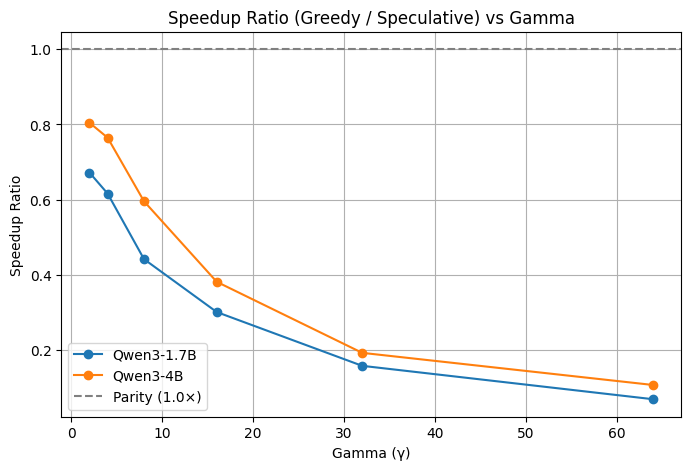

In [6]:
plt.figure(figsize=(8, 5))
for name, data in results_by_model.items():
    gammas = [r["gamma"] for r in data["spec_results"]]
    spec_times = [r["time_taken"] for r in data["spec_results"]]
    speedups = [data["greedy_time"] / t for t in spec_times]
    plt.plot(gammas, speedups, marker='o', label=name)

plt.axhline(1.0, linestyle='--', color='gray', label="Parity (1.0×)")
plt.title("Speedup Ratio (Greedy / Speculative) vs Gamma")
plt.xlabel("Gamma (γ)")
plt.ylabel("Speedup Ratio")
plt.legend()
plt.grid(True)
plt.savefig("comparison_speedup_ratio.png", dpi=600)
plt.show()

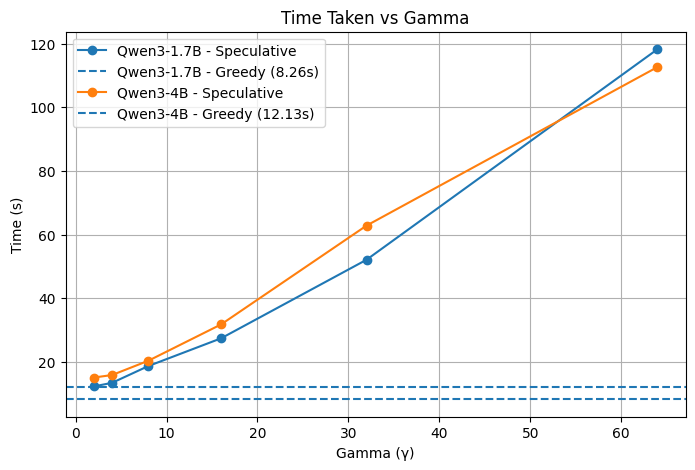

In [7]:
plt.figure(figsize=(8, 5))
for name, data in results_by_model.items():
    gammas = [r["gamma"] for r in data["spec_results"]]
    times = [r["time_taken"] for r in data["spec_results"]]
    plt.plot(gammas, times, marker='o', label=f"{name} - Speculative")
    plt.axhline(data["greedy_time"], linestyle='--', label=f"{name} - Greedy ({data['greedy_time']:.2f}s)")

plt.title("Time Taken vs Gamma")
plt.xlabel("Gamma (γ)")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)
plt.savefig("comparison_time_taken.png", dpi=600)
plt.show()


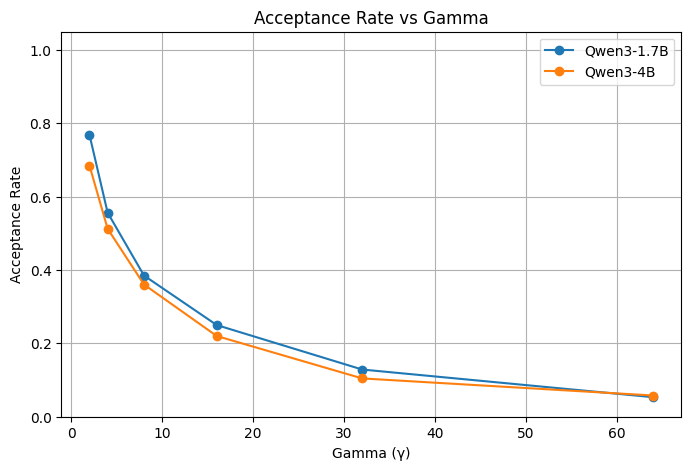

In [8]:
plt.figure(figsize=(8, 5))
for name, data in results_by_model.items():
    gammas = [r["gamma"] for r in data["spec_results"]]
    acceptance_rates = [
        sum(r["accepted_counts"]) / (len(r["accepted_counts"]) * r["gamma"])
        for r in data["spec_results"]
    ]
    plt.plot(gammas, acceptance_rates, marker='o', label=name)

plt.title("Acceptance Rate vs Gamma")
plt.xlabel("Gamma (γ)")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.savefig("comparison_acceptance_rate.png", dpi=600)
plt.show()


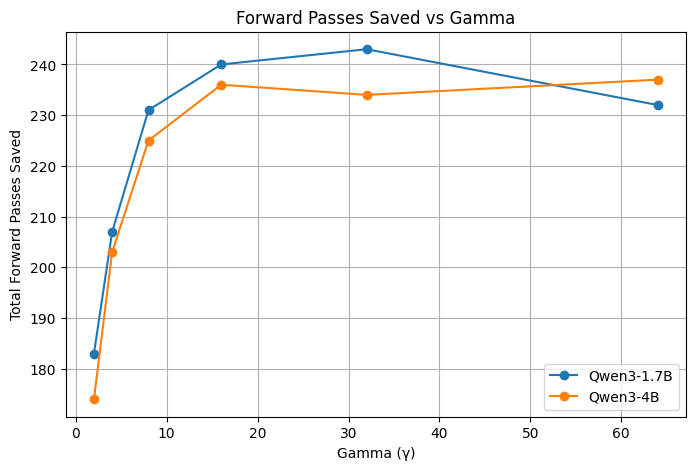

In [9]:
plt.figure(figsize=(8, 5))
for name, data in results_by_model.items():
    gammas = [r["gamma"] for r in data["spec_results"]]
    passes_saved = [r["forward_passes_saved"] for r in data["spec_results"]]
    plt.plot(gammas, passes_saved, marker='o', label=name)

plt.title("Forward Passes Saved vs Gamma")
plt.xlabel("Gamma (γ)")
plt.ylabel("Total Forward Passes Saved")
plt.legend()
plt.grid(True)
plt.savefig("comparison_forward_passes_saved.png", dpi=600)
plt.show()